In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv('bike.csv')
data

/anaconda3/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,2,3,4,5,6,7,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,MemberType,TripDurationSec,BikeID,StartDay,StartDateTime,StartDate,StartTime,StartStationName,StartStationID,EndDay,EndDateTime,EndDate,EndTime,EndStationName,EndStationID
0,Subscriber,235.0,C00198,Tuesday,11/27/2012 05:17:00 PM,11/27/2012,17:17,Market St & ML King Blvd,1325.0,Tuesday,11/27/2012 05:21:00 PM,11/27/2012,17:21,Market St & Cowart St,1311.0
1,Subscriber,101.0,C00156,Tuesday,12/11/2012 04:10:00 PM,12/11/2012,16:10,Market St & ML King Blvd,1325.0,Tuesday,12/11/2012 04:12:00 PM,12/11/2012,16:12,Market St & W 12th St,1309.0
2,Subscriber,478.0,C00092,Wednesday,11/21/2012 04:17:00 PM,11/21/2012,16:17,100 Walnut St,1319.0,Wednesday,11/21/2012 04:25:00 PM,11/21/2012,16:25,200 River St Outdoor Chattanooga,1299.0
3,Customer,2399.0,C00061,Friday,11/23/2012 12:39:00 AM,11/23/2012,00:39,215 Broad St,1303.0,Friday,11/23/2012 01:19:00 AM,11/23/2012,01:19,215 Broad St,1303.0
4,Customer,3412.0,C00030,Saturday,12/08/2012 07:49:00 PM,12/08/2012,19:49,High St & E 2nd St,1321.0,Saturday,12/08/2012 08:46:00 PM,12/08/2012,20:46,High St & E 2nd St,1321.0
5,Subscriber,11.0,C00113,Tuesday,11/20/2012 06:29:00 PM,11/20/2012,18:29,McCallie Ave & Lindsay St,1329.0,Tuesday,11/20/2012 06:29:00 PM,11/20/2012,18:29,McCallie Ave & Lindsay St,1329.0
6,Subscriber,519.0,C00274,Tuesday,12/18/2012 03:33:00 PM,12/18/2012,15:33,100 Walnut St,1319.0,Tuesday,12/18/2012 03:41:00 PM,12/18/2012,15:41,200 River St Outdoor Chattanooga,1299.0
7,Customer,187.0,C00177,Saturday,12/01/2012 09:51:00 PM,12/01/2012,21:51,W Main St & Cowart St,1347.0,Saturday,12/01/2012 09:54:00 PM,12/01/2012,21:54,1216 Broad St,1349.0
8,Subscriber,162.0,C00232,Tuesday,11/20/2012 01:13:00 PM,11/20/2012,13:13,McCallie Ave & Lindsay St,1329.0,Tuesday,11/20/2012 01:16:00 PM,11/20/2012,13:16,Broad St & W 6th St,1317.0
9,Customer,1036.0,C00105,Sunday,12/02/2012 03:00:00 AM,12/02/2012,03:00,Market St & E 14th St,1305.0,Sunday,12/02/2012 03:17:00 AM,12/02/2012,03:17,1216 Broad St,1349.0


In [4]:
data = data[data['StartDay'] == data['EndDay']]

In [5]:
data.columns

Index(['MemberType', 'TripDurationSec', 'BikeID', 'StartDay', 'StartDateTime',
       'StartDate', 'StartTime', 'StartStationName', 'StartStationID',
       'EndDay', 'EndDateTime', 'EndDate', 'EndTime', 'EndStationName',
       'EndStationID'],
      dtype='object')

In [6]:
data = data[['MemberType', 'TripDurationSec', 'StartDay',
       'StartDate', 'StartTime', 'StartStationName', 
    'EndStationName']]

In [7]:
data = data.dropna(how = 'all')

In [8]:
data['StartTime'] = data.StartTime.map(lambda x : x.split(':')[0])

In [9]:
data['StartDate'] = data.StartDate.map(lambda x : x.split('/')[0])

In [10]:
table = data.pivot_table(values= 'TripDurationSec', index= 'StartDay', columns = 'MemberType', aggfunc=np.mean)

In [11]:
table

MemberType,Customer,Dependent,Subscriber
StartDay,,,
Friday,2195.190550,709.800000,865.445032
Monday,2694.397158,1531.100000,962.594446
Saturday,2397.709303,2433.000000,1106.703212
Sunday,6455.625872,2318.619048,1285.583735
Thursday,2410.734668,1452.750000,842.971688
Tuesday,2299.018343,1398.666667,1497.560100
Wednesday,2284.404474,296.500000,881.998620


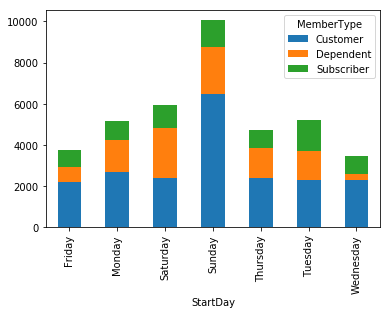

In [12]:
table.plot.bar(stacked = 'bar')

In [13]:
import matplotlib.pyplot as plt


In [14]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

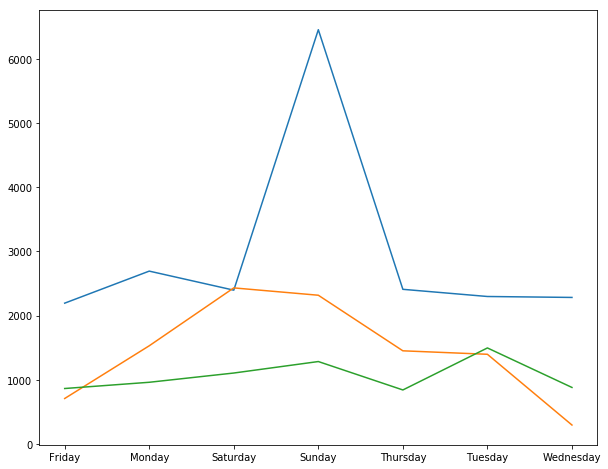

In [15]:
plt.plot(table)